# Sentiment Analysis Using Tensorflow
**Created by Akmal Muzakki on 20/07/2023**

## Imported Libraries

In [115]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

## Prepare and Preprocess the Data

In [116]:
df = pd.read_csv('reviews.csv', names=['nilai', 'review'], sep='\t')
df.head()

,nilai,review
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


Keterangan:
- 1 = Positive
- 0 = Negative

In [117]:
stop_words = nltk.corpus.stopwords.words('english')

In [118]:
def preprocessing(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

df['review'] = df['review'].apply(preprocessing)

## Splitting the Data

In [119]:
X = df['review']
y = df['nilai']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
Tokenizer = Tokenizer(num_words=1000, oov_token='x')
Tokenizer.fit_on_texts(X_train)
Tokenizer.fit_on_texts(X_test)

X_train = pad_sequences(Tokenizer.texts_to_sequences(X_train))
X_test = pad_sequences(Tokenizer.texts_to_sequences(X_test))

## Build the Model

In [121]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nAkurasi telah mencapai >95%!")
            self.model.stop_training = True
            
callbacks = myCallbacks()

In [123]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[callbacks])

Epoch 1/10
173/173 [==============================] - 57s 304ms/step - loss: 0.2656 - accuracy: 0.8851 - val_loss: 0.0580 - val_accuracy: 0.9841
Epoch 2/10
173/173 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9944
Akurasi telah mencapai >95%!
173/173 [==============================] - 47s 274ms/step - loss: 0.0187 - accuracy: 0.9944 - val_loss: 0.0550 - val_accuracy: 0.9863


## Plotting the Model

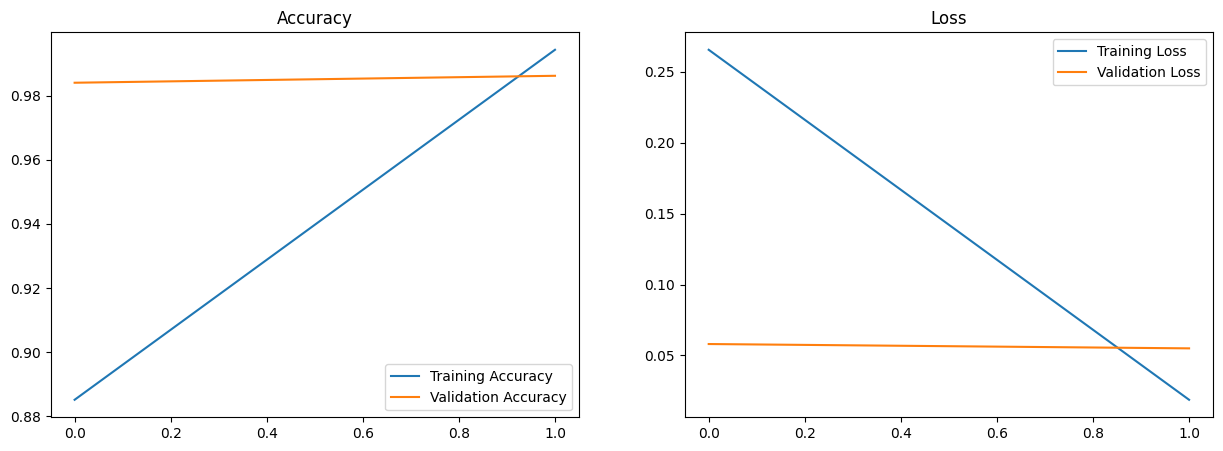

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].legend()

## Testing the Model

In [127]:
def predict(text):
    text = preprocessing(text)
    text = pad_sequences(Tokenizer.texts_to_sequences([text]))
    score = model.predict([text])[0]
    if score >= 0.5:
        print("Positive Review")
    else:
        print("Negative Review")
        
predict("I love this movie")

1/1 [==============================] - 0s 30ms/step
Positive Review


In [129]:
predict("I hate this movie")

1/1 [==============================] - 0s 28ms/step
Negative Review
